In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import pandas as pd

In [3]:
data = pd.read_excel("../data/MtTomData.xls")

In [4]:
data.info

<bound method DataFrame.info of       sample        Hour       m/s        mph
0          1    0.166667  1.609340   3.599991
1          2    0.333333  1.162300   2.599991
2          3    0.500000  1.162300   2.599991
3          4    0.666667  0.849376   1.900000
4          5    0.833333  1.162300   2.599991
...      ...         ...       ...        ...
4459    4460  743.333333  9.030210  20.200004
4460    4461  743.500000  8.761980  19.599991
4461    4462  743.666667  8.136130  18.200004
4462    4463  743.833333  8.091420  18.099991
4463    4464  744.000000  8.091420  18.099991

[4464 rows x 4 columns]>

In [5]:
data.keys()

Index(['sample', 'Hour', 'm/s', 'mph'], dtype='object')

In [6]:
nsamples = len(data)
nsamples

4464

# 1. Average wind speed, standard deviation

In [7]:
data.describe()

,sample,Hour,m/s,mph
count,4464.00000,4464.000000,4464.000000,4464.000000
mean,2232.50000,372.083333,4.649306,10.400202
std,1288.79013,214.798355,2.437550,5.452644
min,1.00000,0.166667,0.000000,0.000000
25%,1116.75000,186.125000,2.905760,6.500000
50%,2232.50000,372.083333,4.559810,10.200004
75%,3348.25000,558.041667,6.169150,13.799996
max,4464.00000,744.000000,15.646400,35.000000


In [8]:
average = data['mph'].mean()
average

10.400201516690913

In [9]:
std = data['mph'].std()
std

5.45264406904914

# 2. Histogram

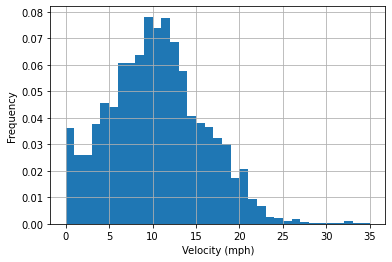

In [10]:
nbins = 35
plt.hist(data["mph"], bins=nbins, density=True)
plt.xlabel("Velocity (mph)")
plt.ylabel("Frequency")
plt.grid()

In [11]:
frequency, bins = np.histogram(data["mph"], bins=nbins)

In [12]:
bins

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35.])

In [13]:
frequency

array([162, 116, 116, 169, 204, 196, 271, 271, 284, 349, 330, 347, 306,
       258, 182, 170, 163, 144, 134,  78,  93,  42,  30,  12,   9,   4,
         8,   3,   2,   2,   1,   1,   4,   2,   1])

In [14]:
vel = (bins[:-1] + bins[1:])/2

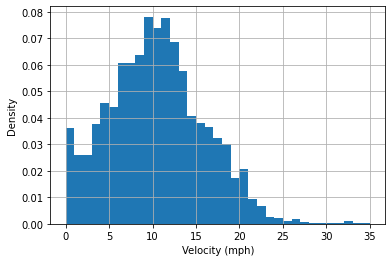

In [15]:
plt.bar(vel, frequency/nsamples, width=1.0)
plt.xlabel("Velocity (mph)")
plt.ylabel("Density")
plt.grid()

# 3. Velocity duration curve

In [16]:
hours = nsamples / 6
hours

744.0

In [17]:
freq_hours = frequency / 6
freq_hours

array([27.        , 19.33333333, 19.33333333, 28.16666667, 34.        ,
       32.66666667, 45.16666667, 45.16666667, 47.33333333, 58.16666667,
       55.        , 57.83333333, 51.        , 43.        , 30.33333333,
       28.33333333, 27.16666667, 24.        , 22.33333333, 13.        ,
       15.5       ,  7.        ,  5.        ,  2.        ,  1.5       ,
        0.66666667,  1.33333333,  0.5       ,  0.33333333,  0.33333333,
        0.16666667,  0.16666667,  0.66666667,  0.33333333,  0.16666667])

In [18]:
hours_cumsum = freq_hours[::-1].cumsum()
hours_cumsum

array([1.66666667e-01, 5.00000000e-01, 1.16666667e+00, 1.33333333e+00,
       1.50000000e+00, 1.83333333e+00, 2.16666667e+00, 2.66666667e+00,
       4.00000000e+00, 4.66666667e+00, 6.16666667e+00, 8.16666667e+00,
       1.31666667e+01, 2.01666667e+01, 3.56666667e+01, 4.86666667e+01,
       7.10000000e+01, 9.50000000e+01, 1.22166667e+02, 1.50500000e+02,
       1.80833333e+02, 2.23833333e+02, 2.74833333e+02, 3.32666667e+02,
       3.87666667e+02, 4.45833333e+02, 4.93166667e+02, 5.38333333e+02,
       5.83500000e+02, 6.16166667e+02, 6.50166667e+02, 6.78333333e+02,
       6.97666667e+02, 7.17000000e+02, 7.44000000e+02])

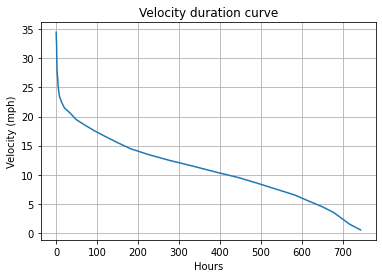

In [19]:
plt.plot(hours_cumsum,vel[::-1])
plt.title("Velocity duration curve")
plt.xlabel("Hours")
plt.ylabel("Velocity (mph)")
plt.grid()

# 4. Power duration curve

## Power (kW) Velocity range (mph)



In [20]:
def power(vel):
    power = np.zeros_like(vel)
    idx = (6. < vel) * (vel <= 25.)
    power[idx] = vel[idx]**3/625
    idx = (25. < vel) * (vel <= 50.)
    power[idx] = 25.
    return power

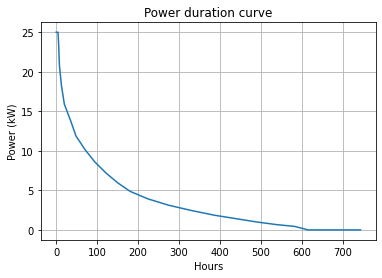

In [21]:
plt.plot(hours_cumsum,power(vel[::-1]))
plt.title("Power duration curve")
plt.xlabel("Hours")
plt.ylabel("Power (kW)")
plt.grid()

# 5. Energy

In [22]:
def energy(hour, power):
    return np.sum(hour * power)

In [23]:
energy(freq_hours, power(vel))

2455.781166666665

# 6. Weibull distribution, Rayleigh distribution

In [24]:
from scipy.special import gamma

In [25]:
k = (std/average)**(-1.08)
c = average/gamma(1+1/k)
k, c

(2.008488611305931, 11.73625116337117)

In [26]:
def Weibull(k,c,U):
    return (k/c)*(U/c)**(k-1) * np.exp(-(U/c)**k)

def Rayleigh(avg, U):
    return np.pi/2 *(U/avg**2) * np.exp(-np.pi/4 * (U/avg)**2)

In [27]:
weibull_dist = Weibull(k,c,vel)
rayleigh_dist = Rayleigh(average,vel)

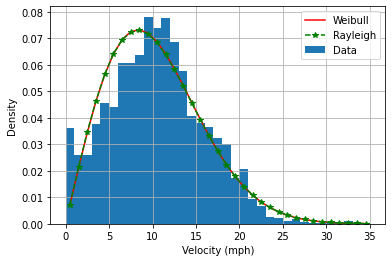

In [28]:
plt.bar(vel, frequency/nsamples, width=1.0, label='Data')
plt.plot(vel, weibull_dist, 'r-', label='Weibull')
plt.plot(vel, rayleigh_dist, 'g*--', label='Rayleigh')
plt.xlabel('Velocity (mph)')
plt.ylabel("Density")
plt.legend()
plt.grid()

# 7. Velocity duration curve, Power duration curve

In [29]:
weibull_cumsum = (weibull_dist[::-1]*hours).cumsum()
rayleigh_cumsum = (rayleigh_dist[::-1]*hours).cumsum()

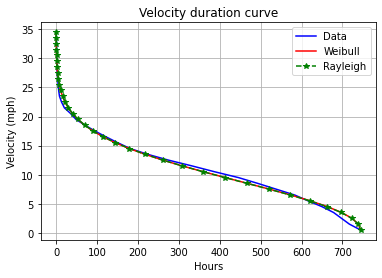

In [30]:
plt.plot(hours_cumsum,vel[::-1], 'b-', label='Data')
plt.plot(weibull_cumsum, vel[::-1], 'r-', label='Weibull')
plt.plot(rayleigh_cumsum, vel[::-1], 'g*--', label='Rayleigh')
plt.title("Velocity duration curve")
plt.xlabel("Hours")
plt.ylabel("Velocity (mph)")
plt.legend()
plt.grid()

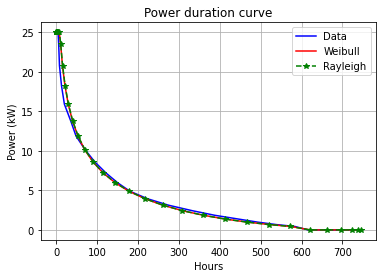

In [31]:
plt.plot(hours_cumsum,power(vel[::-1]), 'b-', label='Data')
plt.plot(weibull_cumsum, power(vel[::-1]), 'r-', label='Weibull')
plt.plot(rayleigh_cumsum, power(vel[::-1]), 'g*--', label='Rayleigh')
plt.title("Power duration curve")
plt.xlabel("Hours")
plt.ylabel("Power (kW)")
plt.legend()
plt.grid()

# 8. Energy

In [32]:
energy(weibull_dist*hours, power(vel))

2452.7292384145353

In [33]:
energy(rayleigh_dist*hours, power(vel))

2460.359116588941